In [1]:
#importing Keras  and other libraries

import time
import numpy as np
from matplotlib import pyplot as plt
from keras.utils import np_utils
import keras.callbacks as cb
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.
/home/sourab/anaconda3/envs/tf/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)


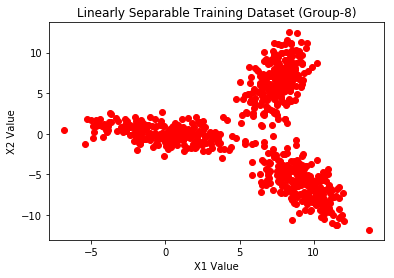

In [3]:
#Data Loading and Preprocessing 

x_train = []
y_train = []
x_valid = []
y_valid = []
x_test = []
y_test = []

with open('./group8/class1_train.txt', 'r') as file:
    for row in file:
        a,b = row.split()
        x_train.append([float(a), float(b)])
        y_train.append(0)

with open('./group8/class2_train.txt', 'r') as file:
    for row in file:
        a,b = row.split()
        x_train.append([float(a), float(b)])
        y_train.append(1)

with open('./group8/class3_train.txt', 'r') as file:
    for row in file:
        a,b = row.split()
        x_train.append([float(a), float(b)])
        y_train.append(2)
        


with open('./group8/class1_val.txt', 'r') as file:
    for row in file:
        a,b = row.split()
        x_valid.append([float(a), float(b)])
        y_valid.append(0)

with open('./group8/class2_val.txt', 'r') as file:
    for row in file:
        a,b = row.split()
        x_valid.append([float(a), float(b)])
        y_valid.append(1)

with open('./group8/class3_val.txt', 'r') as file:
    for row in file:
        a,b = row.split()
        x_valid.append([float(a), float(b)])
        y_valid.append(2)
        
        
        
with open('./group8/class1_test.txt', 'r') as file:
    for row in file:
        a,b = row.split()
        x_test.append([float(a), float(b)])
        y_test.append(0)

with open('./group8/class2_test.txt', 'r') as file:
    for row in file:
        a,b = row.split()
        x_test.append([float(a), float(b)])
        y_test.append(1)

with open('./group8/class3_test.txt', 'r') as file:
    for row in file:
        a,b = row.split()
        x_test.append([float(a), float(b)])
        y_test.append(2)
        

x_train = np.array(x_train)
y_train = np.array(y_train)
y_train_vec = np_utils.to_categorical(y_train, 3)
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)
y_valid_vec = np_utils.to_categorical(y_valid, 3)
x_test = np.array(x_test)
y_test = np.array(y_test)
y_test_vec = np_utils.to_categorical(y_test, 3)

plt.plot(x_train[:,0], x_train[:,1], 'ro')
plt.xlabel('X1 Value')
plt.ylabel('X2 Value')
plt.title('Linearly Separable Training Dataset (Group-8)')
plt.show()

In [4]:
def init_model():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_dim=2))
    #model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    
    sgd = SGD()
    
    model.compile(loss='categorical_crossentropy', optimizer="rmsprop", metrics=['accuracy'])

    return model

In [5]:
model = init_model()
history = LossHistory()
model.fit(x_train, y_train_vec,epochs=300,batch_size=128,callbacks=[history],validation_data=(x_valid, y_valid_vec), verbose=2)
score = model.evaluate(x_test, y_test_vec, batch_size=128)
print("Network's test score [loss, accuracy]: {0}".format(score))

Train on 750 samples, validate on 450 samples
Epoch 1/300
 - 0s - loss: 0.5427 - acc: 0.7013 - val_loss: 0.3094 - val_acc: 0.8467
Epoch 2/300
 - 0s - loss: 0.2638 - acc: 0.8893 - val_loss: 0.2404 - val_acc: 0.9022
Epoch 3/300
 - 0s - loss: 0.2137 - acc: 0.9213 - val_loss: 0.2032 - val_acc: 0.9244
Epoch 4/300
 - 0s - loss: 0.1785 - acc: 0.9467 - val_loss: 0.1704 - val_acc: 0.9400
Epoch 5/300
 - 0s - loss: 0.1476 - acc: 0.9547 - val_loss: 0.1511 - val_acc: 0.9667
Epoch 6/300
 - 0s - loss: 0.1498 - acc: 0.9507 - val_loss: 0.1201 - val_acc: 0.9556
Epoch 7/300
 - 0s - loss: 0.1065 - acc: 0.9693 - val_loss: 0.1018 - val_acc: 0.9667
Epoch 8/300
 - 0s - loss: 0.0911 - acc: 0.9813 - val_loss: 0.1430 - val_acc: 0.9378
Epoch 9/300
 - 0s - loss: 0.0803 - acc: 0.9733 - val_loss: 0.0863 - val_acc: 0.9644
Epoch 10/300
 - 0s - loss: 0.0731 - acc: 0.9813 - val_loss: 0.0672 - val_acc: 0.9756
Epoch 11/300
 - 0s - loss: 0.0557 - acc: 0.9840 - val_loss: 0.2692 - val_acc: 0.8667
Epoch 12/300
 - 0s - loss: 0

Epoch 97/300
 - 0s - loss: 0.0143 - acc: 0.9960 - val_loss: 0.0446 - val_acc: 0.9844
Epoch 98/300
 - 0s - loss: 0.0140 - acc: 0.9947 - val_loss: 0.0335 - val_acc: 0.9911
Epoch 99/300
 - 0s - loss: 0.0125 - acc: 0.9947 - val_loss: 0.0252 - val_acc: 0.9889
Epoch 100/300
 - 0s - loss: 0.0164 - acc: 0.9933 - val_loss: 0.0374 - val_acc: 0.9889
Epoch 101/300
 - 0s - loss: 0.0158 - acc: 0.9933 - val_loss: 0.0270 - val_acc: 0.9889
Epoch 102/300
 - 0s - loss: 0.0132 - acc: 0.9947 - val_loss: 0.0417 - val_acc: 0.9911
Epoch 103/300
 - 0s - loss: 0.0164 - acc: 0.9933 - val_loss: 0.0270 - val_acc: 0.9889
Epoch 104/300
 - 0s - loss: 0.0131 - acc: 0.9933 - val_loss: 0.0697 - val_acc: 0.9800
Epoch 105/300
 - 0s - loss: 0.0194 - acc: 0.9880 - val_loss: 0.0358 - val_acc: 0.9889
Epoch 106/300
 - 0s - loss: 0.0151 - acc: 0.9920 - val_loss: 0.0251 - val_acc: 0.9889
Epoch 107/300
 - 0s - loss: 0.0178 - acc: 0.9907 - val_loss: 0.0355 - val_acc: 0.9844
Epoch 108/300
 - 0s - loss: 0.0170 - acc: 0.9933 - val_lo

Epoch 193/300
 - 0s - loss: 0.0116 - acc: 0.9920 - val_loss: 0.0425 - val_acc: 0.9911
Epoch 194/300
 - 0s - loss: 0.0101 - acc: 0.9960 - val_loss: 0.0378 - val_acc: 0.9889
Epoch 195/300
 - 0s - loss: 0.0125 - acc: 0.9947 - val_loss: 0.0389 - val_acc: 0.9911
Epoch 196/300
 - 0s - loss: 0.0107 - acc: 0.9960 - val_loss: 0.0357 - val_acc: 0.9867
Epoch 197/300
 - 0s - loss: 0.0102 - acc: 0.9960 - val_loss: 0.0346 - val_acc: 0.9867
Epoch 198/300
 - 0s - loss: 0.0087 - acc: 0.9973 - val_loss: 0.0366 - val_acc: 0.9911
Epoch 199/300
 - 0s - loss: 0.0106 - acc: 0.9933 - val_loss: 0.0338 - val_acc: 0.9867
Epoch 200/300
 - 0s - loss: 0.0142 - acc: 0.9947 - val_loss: 0.0322 - val_acc: 0.9867
Epoch 201/300
 - 0s - loss: 0.0148 - acc: 0.9920 - val_loss: 0.0419 - val_acc: 0.9911
Epoch 202/300
 - 0s - loss: 0.0138 - acc: 0.9947 - val_loss: 0.0420 - val_acc: 0.9911
Epoch 203/300
 - 0s - loss: 0.0094 - acc: 0.9960 - val_loss: 0.0364 - val_acc: 0.9911
Epoch 204/300
 - 0s - loss: 0.0102 - acc: 0.9960 - val

Epoch 289/300
 - 0s - loss: 0.0084 - acc: 0.9960 - val_loss: 0.0339 - val_acc: 0.9867
Epoch 290/300
 - 0s - loss: 0.0085 - acc: 0.9960 - val_loss: 0.0541 - val_acc: 0.9889
Epoch 291/300
 - 0s - loss: 0.0059 - acc: 0.9987 - val_loss: 0.0428 - val_acc: 0.9911
Epoch 292/300
 - 0s - loss: 0.0086 - acc: 0.9960 - val_loss: 0.0378 - val_acc: 0.9867
Epoch 293/300
 - 0s - loss: 0.0087 - acc: 0.9960 - val_loss: 0.0642 - val_acc: 0.9911
Epoch 294/300
 - 0s - loss: 0.0098 - acc: 0.9960 - val_loss: 0.0468 - val_acc: 0.9889
Epoch 295/300
 - 0s - loss: 0.0071 - acc: 0.9960 - val_loss: 0.0587 - val_acc: 0.9889
Epoch 296/300
 - 0s - loss: 0.0078 - acc: 0.9973 - val_loss: 0.0462 - val_acc: 0.9867
Epoch 297/300
 - 0s - loss: 0.0098 - acc: 0.9960 - val_loss: 0.0457 - val_acc: 0.9911
Epoch 298/300
 - 0s - loss: 0.0080 - acc: 0.9960 - val_loss: 0.0483 - val_acc: 0.9867
Epoch 299/300
 - 0s - loss: 0.0090 - acc: 0.9960 - val_loss: 0.0518 - val_acc: 0.9889
Epoch 300/300
 - 0s - loss: 0.0064 - acc: 0.9987 - val

750/750 [==============================] - 0s 26us/step
The accuracy of the MLFFNN model on the training data: 99.7333333333 %


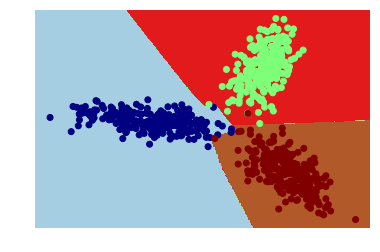

array([[249,   0,   1],
       [  0, 250,   0],
       [  0,   1, 249]])

In [6]:
y_pred_train = model.predict(x_train, batch_size=128)
y_pred_train = np.argmax(y_pred_train, axis=1)
score = model.evaluate(x_train, y_train_vec, batch_size=128)
print("The accuracy of the MLFFNN model on the training data:", score[1]*100,"%")

x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# here "model" is your model's prediction (classification) function
Z = np.argmax(model.predict(np.c_[xx.ravel(), yy.ravel()]), axis=1)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('off')

# Plot also the training points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.jet)
plt.show()

#confusion Matrix
confusion_matrix(y_train, y_pred_train,labels=[0, 1, 2])


450/450 [==============================] - 0s 34us/step
The accuracy of the MLFFNN model on the validation data: 98.8888888889 %


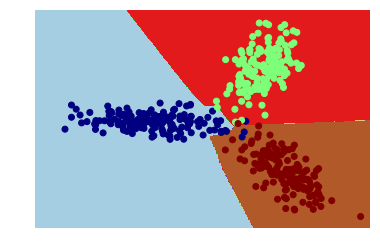

array([[147,   1,   2],
       [  1, 149,   0],
       [  0,   1, 149]])

In [7]:
y_pred_valid = model.predict(x_valid, batch_size=128)
y_pred_valid = np.argmax(y_pred_valid, axis=1)
score = model.evaluate(x_valid, y_valid_vec, batch_size=128)
print("The accuracy of the MLFFNN model on the validation data:", score[1]*100,"%")

x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# here "model" is your model's prediction (classification) function
Z = np.argmax(model.predict(np.c_[xx.ravel(), yy.ravel()]), axis=1)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('off')

# Plot also the training points
plt.scatter(x_valid[:, 0], x_valid[:, 1], c=y_valid, cmap=plt.cm.jet)
plt.show()

#confusion Matrix
confusion_matrix(y_valid, y_pred_valid,labels=[0, 1, 2])

300/300 [==============================] - 0s 34us/step
The accuracy of the MLFFNN model on the test data: 99.3333333333 %


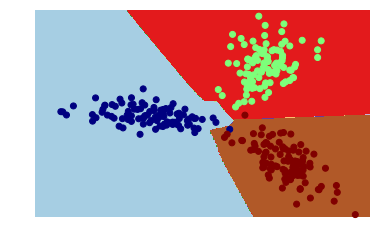

array([[ 99,   0,   1],
       [  0, 100,   0],
       [  0,   1,  99]])

In [8]:
y_pred_test = model.predict(x_test, batch_size=128)
y_pred_test = np.argmax(y_pred_test, axis=1)
score = model.evaluate(x_test, y_test_vec, batch_size=128)
print("The accuracy of the MLFFNN model on the test data:", score[1]*100,"%")

x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# here "model" is your model's prediction (classification) function
Z = np.argmax(model.predict(np.c_[xx.ravel(), yy.ravel()]), axis=1)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('off')

# Plot also the training points
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=plt.cm.jet)
plt.show()

#confusion Matrix
confusion_matrix(y_test, y_pred_test,labels=[0, 1, 2])